### Life expectancy and its effecting factors

 ### Problem statement: Find out the Area which should be given importance in order to efficiently improve the life expectancy of its population.

In [165]:
import pandas as pd 
import numpy as np  
from sklearn import linear_model
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Importing data  

In [166]:
data = pd.read_csv("/Users/mrbinit/Downloads/Life Expectancy Data.csv")

In [167]:
data.shape

(2938, 22)

In [168]:
data.head(10)

Country  Year      Status  Life expectancy   Adult Mortality   
0  Afghanistan  2015  Developing              65.0            263.0  \
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...   
0             62     0.01               71.279624         65.0      1154  ...  \
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   
5             74     0.01               79.679367         66.0      1989  ...   
6             77     0.01               56.762217         63.0      2861  ...   
7             80     0.03               25.873925         64.0      1599  ...   
8             82     0.02               10.910156         63.0      1141  ...   
9             84     0.03               17.171518         64.0      1990  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population   
0    6.0               8.16         65.0        0.1  584.259210  33736494.0  \
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   
5   66.0               9.20         66.0        0.1  553.328940   2883167.0   
6   63.0               9.42         63.0        0.1  445.893298    284331.0   
7   64.0               8.33         64.0        0.1  373.361116   2729431.0   
8   63.0               6.73         63.0        0.1  369.835796  26616792.0   
9   58.0               7.43         58.0        0.1  272.563770   2589345.0   

    thinness  1-19 years   thinness 5-9 years   
0                   17.2                 17.3  \
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   
5                   18.4                 18.4   
6                   18.6                 18.7   
7                   18.8                 18.9   
8                   19.0                 19.1   
9                   19.2                 19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1  

[10 rows x 22 columns]

### Creating dummy variables for country

In [169]:
status_dummy = pd.get_dummies(data.Status,drop_first = True)
status_dummy = status_dummy.astype(int)
status_dummy.head()

Developing
0           1
1           1
2           1
3           1
4           1

life expectency : x (dependent variable )
other: indepdent variable

In [170]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Dropping the unnecessary variables

In [171]:
data.drop(['Country', 'Year','infant deaths','percentage expenditure',' thinness  1-19 years', ' thinness 5-9 years'],axis=1,inplace=True)

In [172]:
new_data = pd.concat([status_dummy, data], axis=1)


### Dropping status

In [173]:
new_data.drop(['Status'], axis = 1, inplace = True )

In [174]:
new_data.head(10)

Developing  Life expectancy   Adult Mortality  Alcohol  Hepatitis B   
0           1              65.0            263.0     0.01         65.0  \
1           1              59.9            271.0     0.01         62.0   
2           1              59.9            268.0     0.01         64.0   
3           1              59.5            272.0     0.01         67.0   
4           1              59.2            275.0     0.01         68.0   
5           1              58.8            279.0     0.01         66.0   
6           1              58.6            281.0     0.01         63.0   
7           1              58.1            287.0     0.03         64.0   
8           1              57.5            295.0     0.02         63.0   
9           1              57.3            295.0     0.03         64.0   

   Measles    BMI   under-five deaths   Polio  Total expenditure  Diphtheria    
0      1154   19.1                  83    6.0               8.16         65.0  \
1       492   18.6                  86   58.0               8.18         62.0   
2       430   18.1                  89   62.0               8.13         64.0   
3      2787   17.6                  93   67.0               8.52         67.0   
4      3013   17.2                  97   68.0               7.87         68.0   
5      1989   16.7                 102   66.0               9.20         66.0   
6      2861   16.2                 106   63.0               9.42         63.0   
7      1599   15.7                 110   64.0               8.33         64.0   
8      1141   15.2                 113   63.0               6.73         63.0   
9      1990   14.7                 116   58.0               7.43         58.0   

    HIV/AIDS         GDP  Population  Income composition of resources   
0        0.1  584.259210  33736494.0                            0.479  \
1        0.1  612.696514    327582.0                            0.476   
2        0.1  631.744976  31731688.0                            0.470   
3        0.1  669.959000   3696958.0                            0.463   
4        0.1   63.537231   2978599.0                            0.454   
5        0.1  553.328940   2883167.0                            0.448   
6        0.1  445.893298    284331.0                            0.434   
7        0.1  373.361116   2729431.0                            0.433   
8        0.1  369.835796  26616792.0                            0.415   
9        0.1  272.563770   2589345.0                            0.405   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  
5        9.2  
6        8.9  
7        8.7  
8        8.4  
9        8.1

### FINDING THE MISSING VALUE  

In [175]:
missing_value = new_data.isnull().sum()
print(missing_value)

Developing                           0
Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
Income composition of resources    167
Schooling                          163
dtype: int64


### FILLING THE MISSING Data with mean

In [176]:
new_data.fillna(new_data.mean(), inplace=True)

In [177]:
missing_value = new_data.isnull().sum()
print(missing_value)

Developing                         0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64


### Changing the name of the column

In [178]:
new_data.columns

Index(['Developing', 'Life expectancy ', 'Adult Mortality', 'Alcohol',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [179]:
column_name_mapping = {
    'Developing': 'Country_Status',
    'Life expectancy ': 'Life_Expectancy',
    'Adult Mortality': 'Adult_Mortality',
    'Alcohol': 'Alcohol_Consumption',
    'Hepatitis B': 'Hepatitis_B',
    'Measles ': 'Measles_Cases',
    'under-five deaths ': 'Under_Five_Deaths',
    'Polio': 'Polio_Vaccination',
    'Total expenditure': 'Total_Expenditure',
    'Diphtheria ': 'Diphtheria_Vaccination',
    ' HIV/AIDS': 'HIV_AIDS',
    'GDP': 'Gross_Domestic_Product',
    'Population': 'Population_Size',
    'Income composition of resources': 'Income_Composition',
    ' BMI ': 'Body_Mass_Index',
    'Schooling': 'Years_of_Schooling'
}

# Use the rename() method to change the column names
new_data.rename(columns=column_name_mapping, inplace=True)

In [180]:
new_data.columns

Index(['Country_Status', 'Life_Expectancy', 'Adult_Mortality',
       'Alcohol_Consumption', 'Hepatitis_B', 'Measles_Cases',
       'Body_Mass_Index', 'Under_Five_Deaths', 'Polio_Vaccination',
       'Total_Expenditure', 'Diphtheria_Vaccination', 'HIV_AIDS',
       'Gross_Domestic_Product', 'Population_Size', 'Income_Composition',
       'Years_of_Schooling'],
      dtype='object')

### Value count

In [181]:
new_data.Years_of_Schooling.value_counts()

Years_of_Schooling
11.992793    163
12.900000     58
13.300000     52
12.500000     49
12.800000     46
            ... 
20.700000      1
3.400000       1
3.600000       1
19.800000      1
2.800000       1
Name: count, Length: 174, dtype: int64

In [182]:
new_data.Body_Mass_Index.value_counts()

Body_Mass_Index
38.321247    34
58.500000    18
55.800000    16
57.000000    16
54.200000    15
             ..
66.700000     1
69.000000     1
69.500000     1
7.200000      1
33.900000     1
Name: count, Length: 609, dtype: int64

In [183]:
new_data.Income_Composition.value_counts()

Income_Composition
0.627551    167
0.000000    130
0.700000     17
0.739000     13
0.714000     12
           ... 
0.933000      1
0.930000      1
0.925000      1
0.347000      1
0.460000      1
Name: count, Length: 626, dtype: int64

In [184]:
new_data.Gross_Domestic_Product.value_counts()

Gross_Domestic_Product
7483.158469    448
584.259210       1
354.818600       1
358.997310       1
43.646498        1
              ... 
4274.376857      1
4142.869175      1
3725.632210      1
2964.477340      1
547.358878       1
Name: count, Length: 2491, dtype: int64

In [185]:
new_data.Country_Status.value_counts()

Country_Status
1    2426
0     512
Name: count, dtype: int64

In [186]:
new_data.Life_Expectancy.value_counts()

Life_Expectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 363, dtype: int64

In [187]:
new_data.Adult_Mortality.value_counts()

Adult_Mortality
12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
         ..
666.0     1
675.0     1
654.0     1
633.0     1
665.0     1
Name: count, Length: 426, dtype: int64

In [188]:
new_data.Alcohol_Consumption.value_counts()

Alcohol_Consumption
0.010000    288
4.602861    194
0.030000     15
0.040000     13
0.020000     12
           ... 
4.330000      1
7.090000      1
5.540000      1
3.460000      1
4.570000      1
Name: count, Length: 1077, dtype: int64

In [189]:
new_data.Hepatitis_B.value_counts()

Hepatitis_B
80.940461    553
99.000000    240
98.000000    210
96.000000    167
97.000000    155
            ... 
15.000000      1
12.000000      1
32.000000      1
11.000000      1
19.000000      1
Name: count, Length: 88, dtype: int64

In [190]:
new_data.Measles_Cases.value_counts()

Measles_Cases
0        983
1        104
2         68
3         44
4         33
        ... 
56188      1
44258      1
41144      1
64185      1
1483       1
Name: count, Length: 958, dtype: int64

In [191]:
new_data.Under_Five_Deaths.value_counts()

Under_Five_Deaths
0      785
1      361
2      163
4      161
3      129
      ... 
330      1
329      1
327      1
326      1
166      1
Name: count, Length: 252, dtype: int64

In [192]:
new_data.Polio_Vaccination.value_counts()

Polio_Vaccination
99.0    376
98.0    255
96.0    207
97.0    205
95.0    180
       ... 
24.0      2
39.0      2
17.0      1
23.0      1
33.0      1
Name: count, Length: 74, dtype: int64

In [193]:
new_data.Total_Expenditure.value_counts()

Total_Expenditure
5.93819     226
4.60000      15
6.70000      12
5.60000      11
9.10000      10
           ... 
3.19000       1
12.24000      1
12.23000      1
13.66000      1
3.52000       1
Name: count, Length: 819, dtype: int64

In [194]:
new_data.Diphtheria_Vaccination.value_counts()

Diphtheria_Vaccination
99.0    350
98.0    254
97.0    205
96.0    201
95.0    200
       ... 
16.0      1
56.0      1
21.0      1
19.0      1
27.0      1
Name: count, Length: 82, dtype: int64

In [195]:
new_data.HIV_AIDS.value_counts()

HIV_AIDS
0.1     1781
0.2      124
0.3      115
0.4       69
0.5       42
        ... 
29.8       1
31.2       1
32.5       1
33.8       1
43.5       1
Name: count, Length: 200, dtype: int64

In [196]:
new_data.Population_Size.value_counts()

Population_Size
1.275338e+07    652
4.440000e+02      4
7.182390e+05      2
1.141000e+03      2
2.686800e+04      2
               ... 
4.136000e+03      1
4.820000e+02      1
4.300000e+01      1
3.978000e+03      1
1.222225e+07      1
Name: count, Length: 2279, dtype: int64

In [197]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country_Status          2938 non-null   int64  
 1   Life_Expectancy         2938 non-null   float64
 2   Adult_Mortality         2938 non-null   float64
 3   Alcohol_Consumption     2938 non-null   float64
 4   Hepatitis_B             2938 non-null   float64
 5   Measles_Cases           2938 non-null   int64  
 6   Body_Mass_Index         2938 non-null   float64
 7   Under_Five_Deaths       2938 non-null   int64  
 8   Polio_Vaccination       2938 non-null   float64
 9   Total_Expenditure       2938 non-null   float64
 10  Diphtheria_Vaccination  2938 non-null   float64
 11  HIV_AIDS                2938 non-null   float64
 12  Gross_Domestic_Product  2938 non-null   float64
 13  Population_Size         2938 non-null   float64
 14  Income_Composition      2938 non-null   

### Data visualization

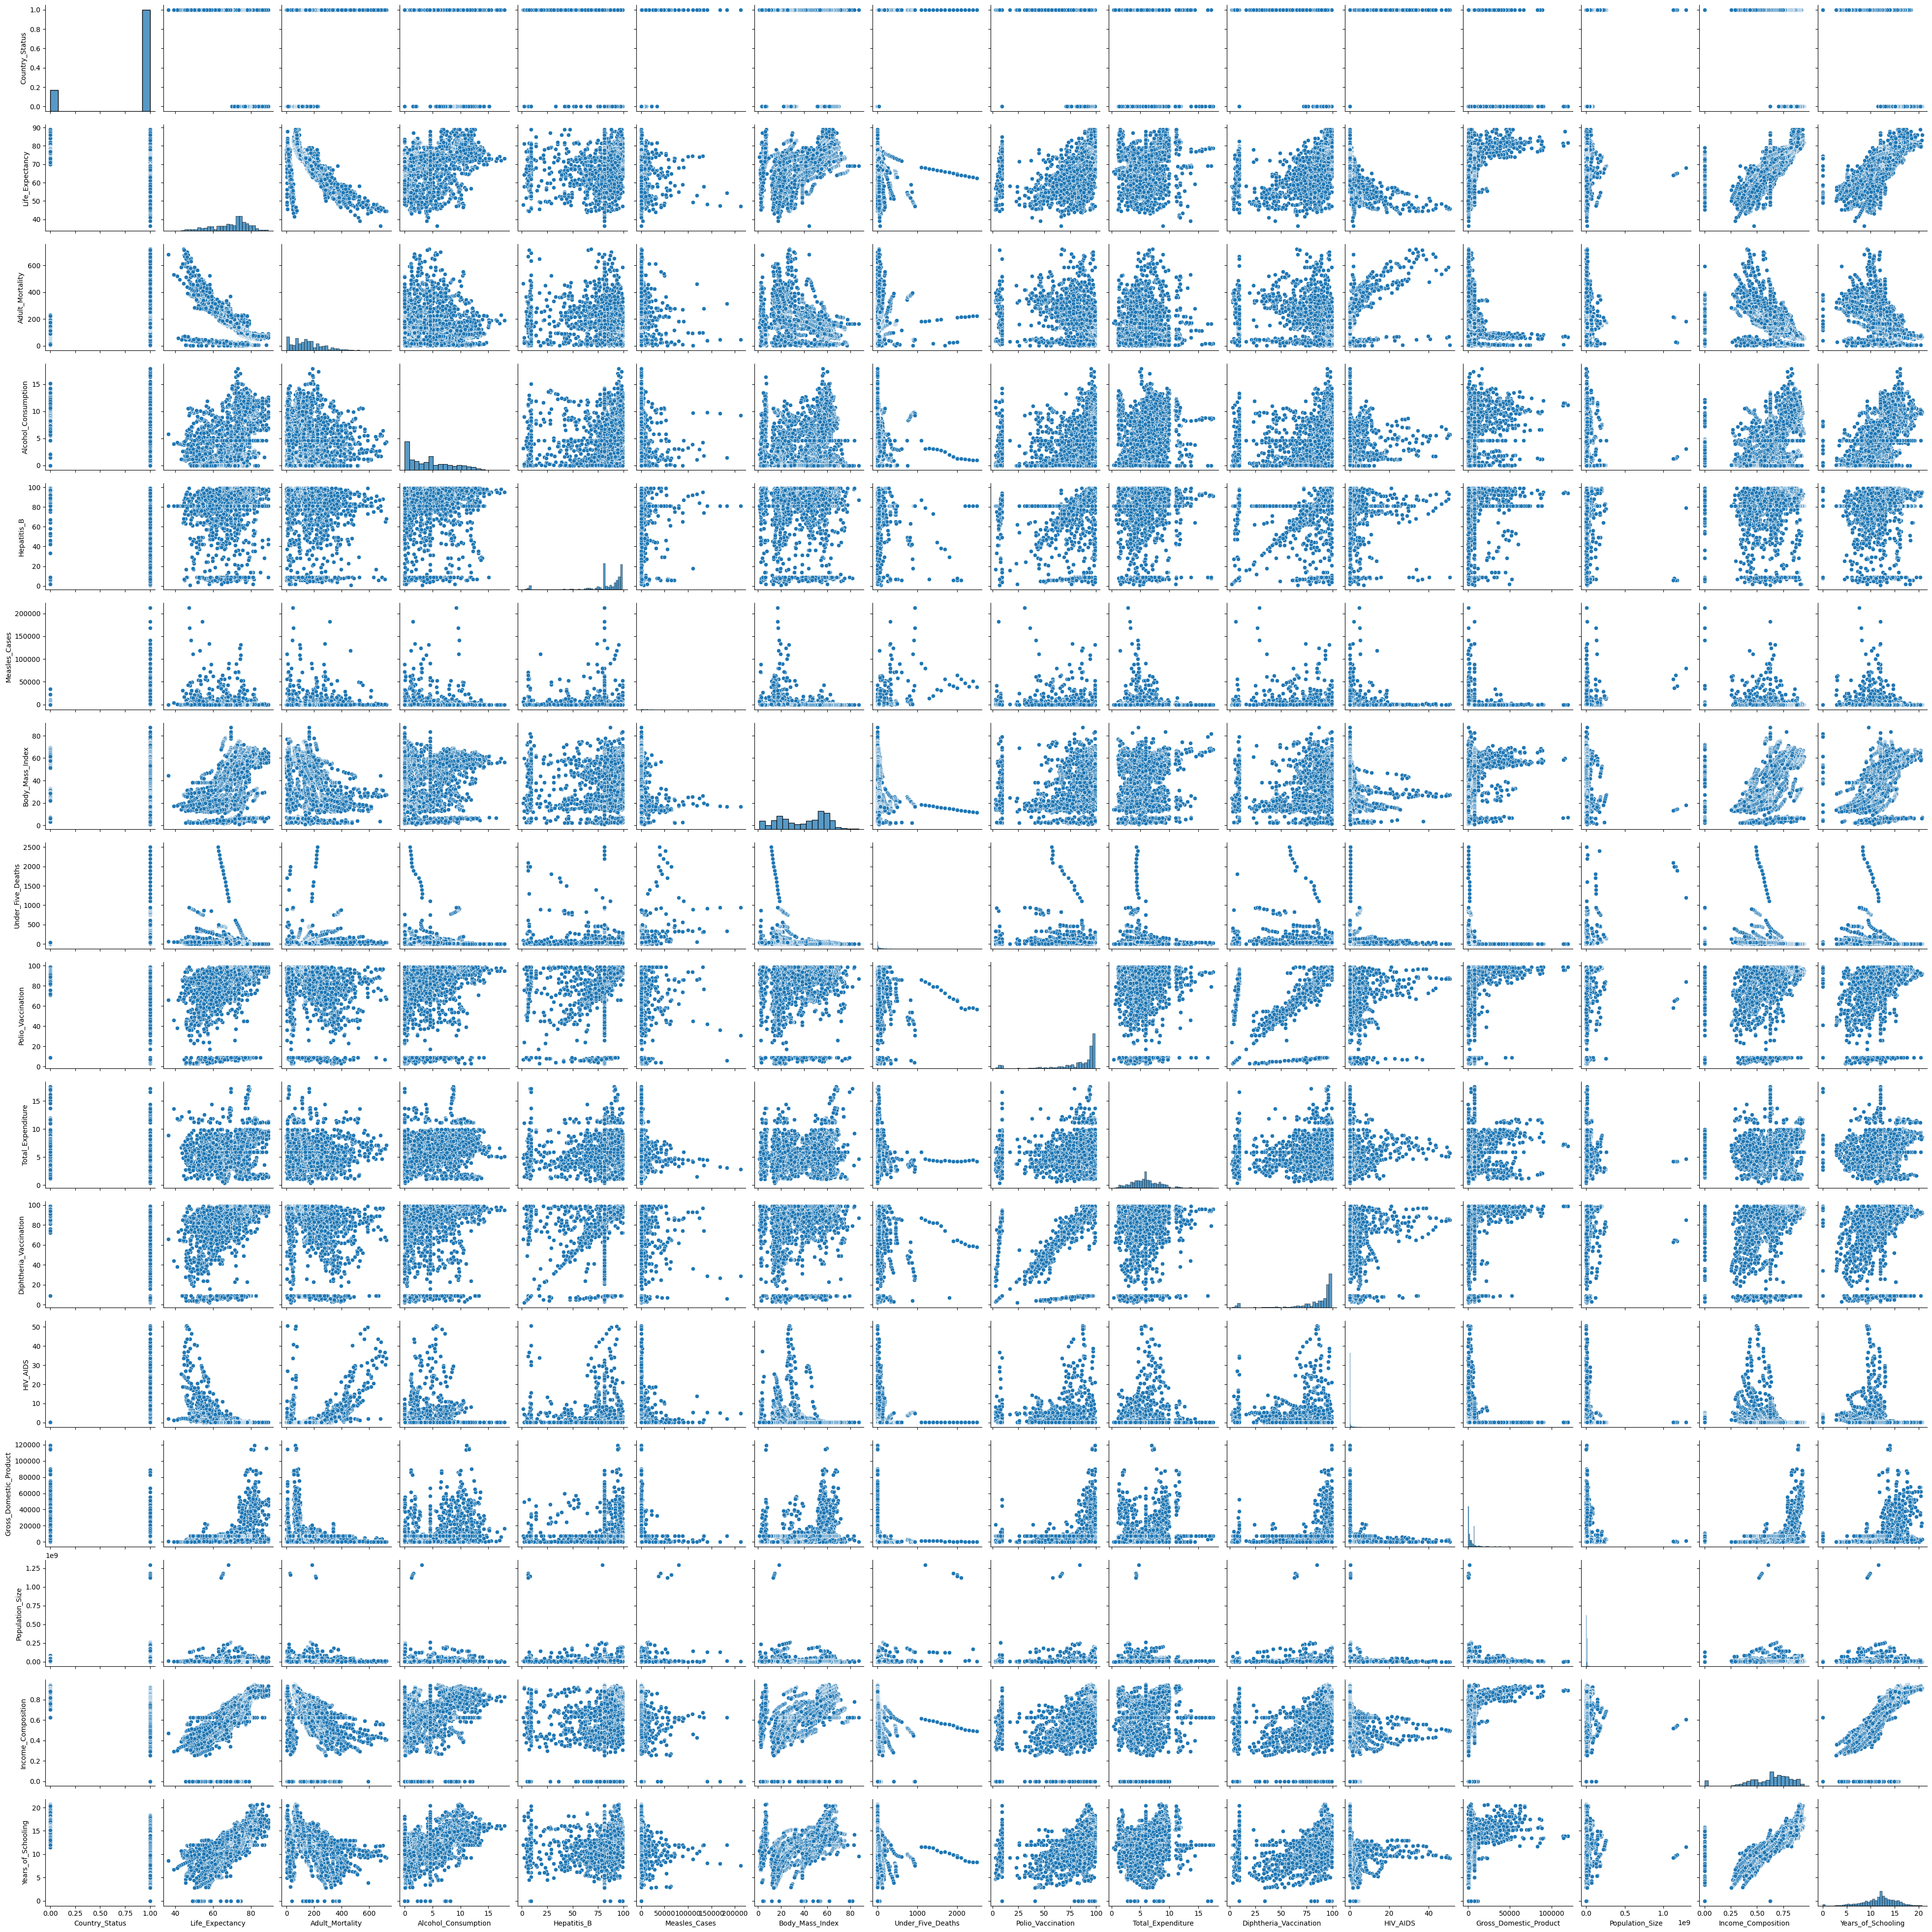

In [198]:
sns.pairplot(new_data)
plt.show()

### Correlation

In [199]:
coorelation_matrix = new_data.corr()
coorelation_matrix

Country_Status  Life_Expectancy  Adult_Mortality   
Country_Status                1.000000        -0.481962         0.315171  \
Life_Expectancy              -0.481962         1.000000        -0.696359   
Adult_Mortality               0.315171        -0.696359         1.000000   
Alcohol_Consumption          -0.579371         0.391598        -0.190408   
Hepatitis_B                  -0.095642         0.203771        -0.138591   
Measles_Cases                 0.076955        -0.157574         0.031174   
Body_Mass_Index              -0.310873         0.559255        -0.381449   
Under_Five_Deaths             0.115195        -0.222503         0.094135   
Polio_Vaccination            -0.220098         0.461574        -0.272694   
Total_Expenditure            -0.289985         0.207981        -0.110875   
Diphtheria_Vaccination       -0.216763         0.475418        -0.273014   
HIV_AIDS                      0.148590        -0.556457         0.523727   
Gross_Domestic_Product       -0.445911         0.430493        -0.277053   
Population_Size               0.041091        -0.019638        -0.012501   
Income_Composition           -0.457302         0.692483        -0.440062   
Years_of_Schooling           -0.491444         0.715066        -0.435108   

                        Alcohol_Consumption  Hepatitis_B  Measles_Cases   
Country_Status                    -0.579371    -0.095642       0.076955  \
Life_Expectancy                    0.391598     0.203771      -0.157574   
Adult_Mortality                   -0.190408    -0.138591       0.031174   
Alcohol_Consumption                1.000000     0.075447      -0.051055   
Hepatitis_B                        0.075447     1.000000      -0.090317   
Measles_Cases                     -0.051055    -0.090317       1.000000   
Body_Mass_Index                    0.318070     0.134929      -0.175925   
Under_Five_Deaths                 -0.110777    -0.184413       0.507809   
Polio_Vaccination                  0.213744     0.408519      -0.136146   
Total_Expenditure                  0.294898     0.050084      -0.104569   
Diphtheria_Vaccination             0.215242     0.499958      -0.141861   
HIV_AIDS                          -0.048650    -0.102405       0.030899   
Gross_Domestic_Product             0.318591     0.062318      -0.068060   
Population_Size                   -0.030765    -0.109811       0.236250   
Income_Composition                 0.416099     0.150992      -0.115764   
Years_of_Schooling                 0.497546     0.171755      -0.122609   

                        Body_Mass_Index  Under_Five_Deaths  Polio_Vaccination   
Country_Status                -0.310873           0.115195          -0.220098  \
Life_Expectancy                0.559255          -0.222503           0.461574   
Adult_Mortality               -0.381449           0.094135          -0.272694   
Alcohol_Consumption            0.318070          -0.110777           0.213744   
Hepatitis_B                    0.134929          -0.184413           0.408519   
Measles_Cases                 -0.175925           0.507809          -0.136146   
Body_Mass_Index                1.000000          -0.237586           0.282156   
Under_Five_Deaths             -0.237586           1.000000          -0.188703   
Polio_Vaccination              0.282156          -0.188703           1.000000   
Total_Expenditure              0.231814          -0.128269           0.130129   
Diphtheria_Vaccination         0.281059          -0.195651           0.673553   
HIV_AIDS                      -0.243548           0.038062          -0.159489   
Gross_Domestic_Product         0.276645          -0.110640           0.193980   
Population_Size               -0.063238           0.535864          -0.034882   
Income_Composition             0.479837          -0.161533           0.355398   
Years_of_Schooling             0.508105          -0.207111           0.385832   

                        Total_Expenditure  Diphtheria_Vaccination  HIV_AIDS  

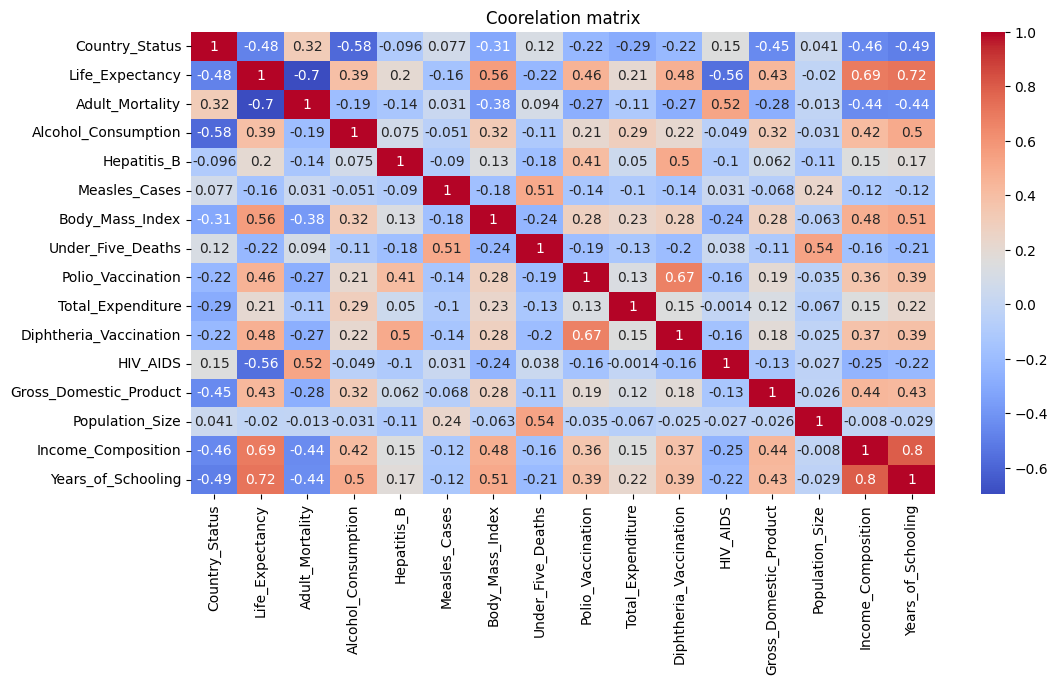

In [200]:
plt.figure(figsize = (12, 6))
sns.heatmap(coorelation_matrix, cmap= 'coolwarm', annot= True)
plt.title('Coorelation matrix')
plt.show()


In [201]:
data_train, data_test = train_test_split(new_data, train_size = 0.7, random_state = 100)
print(data_train.shape)
print(data_test.shape)

(2056, 16)
(882, 16)


In [202]:
data_train.columns

Index(['Country_Status', 'Life_Expectancy', 'Adult_Mortality',
       'Alcohol_Consumption', 'Hepatitis_B', 'Measles_Cases',
       'Body_Mass_Index', 'Under_Five_Deaths', 'Polio_Vaccination',
       'Total_Expenditure', 'Diphtheria_Vaccination', 'HIV_AIDS',
       'Gross_Domestic_Product', 'Population_Size', 'Income_Composition',
       'Years_of_Schooling'],
      dtype='object')

In [203]:
data_train.head(10)

Country_Status  Life_Expectancy  Adult_Mortality  Alcohol_Consumption   
405                1             57.5            279.0                 4.55  \
989                1             72.3            134.0                 3.74   
2351               0             79.1              9.0                10.52   
1856               0             79.2             79.0                 9.15   
1479               1             51.1            527.0                 2.71   
2203               1             73.2            136.0                 0.01   
223                1             73.3            127.0                 7.43   
1710               1             67.7            179.0                 2.02   
363                1             72.0             17.0                 6.85   
2288               1             72.2            184.0                 6.33   

      Hepatitis_B  Measles_Cases  Body_Mass_Index  Under_Five_Deaths   
405     91.000000           2511             16.6                 74  \
989     64.000000           6847             48.1                  1   
2351    80.940461              0             56.4                  0   
1856    88.000000             33             61.5                  0   
1479    93.000000           2488             29.7                  6   
2203    64.000000              1             73.4                  0   
223     80.940461              0             43.0                  0   
1710     8.000000              0             63.2                  0   
363     96.000000              0             46.9                 93   
2288    99.000000              0             31.8                  0   

      Polio_Vaccination  Total_Expenditure  Diphtheria_Vaccination  HIV_AIDS   
405                 9.0               7.17                    91.0       1.0  \
989                66.0               8.53                    78.0       0.1   
2351               96.0               9.38                    96.0       0.1   
1856               87.0               7.89                    89.0       0.1   
1479               92.0               1.87                    93.0      13.4   
2203               62.0               5.20                    64.0       0.1   
223                86.0               5.16                    93.0       0.9   
1710               82.0               1.64                    78.0       0.1   
363                99.0               7.70                    99.0       0.1   
2288               99.0               2.64                    99.0       0.1   

      Gross_Domestic_Product  Population_Size  Income_Composition   
405               575.446453     1.565217e+06               0.365  \
989               127.367228     4.245000e+03               0.694   
2351            24633.797850     2.396690e+05               0.873   
1856             2542.399350     1.275338e+07               0.884   
1479             1173.262120     2.455100e+04               0.464   
2203             4234.554443     1.891940e+05               0.698   
223             11568.111100     1.275338e+07               0.741   
1710             7483.158469     1.275338e+07               0.616   
363              3623.476670     1.847385e+08               0.695   
2288            11122.862700     8.695600e+04               0.739   

      Years_of_Schooling  
405                  6.3  
989                 12.0  
2351                16.9  
1856                18.4  
1479                10.9  
2203                12.9  
223                 14.0  
1710                10.5  
363                 14.0  
2288                13.2

### Data normalization

In [204]:
scaler = MinMaxScaler()
numeric = ['Life_Expectancy', 'Adult_Mortality',
       'Alcohol_Consumption', 'Hepatitis_B', 'Measles_Cases',
       'Under_Five_Deaths', 'Polio_Vaccination', 'Total_Expenditure',
       'Diphtheria_Vaccination', 'HIV_AIDS', 'Gross_Domestic_Product',
       'Population_Size', 'Income_Composition', 'Years_of_Schooling', 'Body_Mass_Index']
data_train[numeric] = scaler.fit_transform(data_train[numeric])
data_train

Country_Status  Life_Expectancy  Adult_Mortality  Alcohol_Consumption   
405                1            0.370         0.385042             0.254199  \
989                1            0.666         0.184211             0.208847   
2351               0            0.802         0.011080             0.588466   
1856               0            0.804         0.108033             0.511758   
1479               1            0.242         0.728532             0.151176   
...              ...              ...              ...                  ...   
1930               1            0.736         0.019391             0.029675   
79                 1            0.692         0.214681             0.406495   
1859               0            0.790         0.113573             0.489362   
2840               1            0.568         0.254848             0.085106   
1544               0            0.880         0.103878             0.638858   

      Hepatitis_B  Measles_Cases  Body_Mass_Index  Under_Five_Deaths   
405      0.918367       0.011834         0.189550             0.0296  \
989      0.642857       0.032269         0.572296             0.0004   
2351     0.815719       0.000000         0.673147             0.0000   
1856     0.887755       0.000156         0.735115             0.0000   
1479     0.938776       0.011726         0.348724             0.0024   
...           ...            ...              ...                ...   
1930     1.000000       0.000024         0.619684             0.0004   
79       0.815719       0.000000         0.452005             0.0000   
1859     0.081633       0.000306         0.712029             0.0000   
2840     0.815719       0.000104         0.416768             0.0136   
1544     0.959184       0.000000         0.702309             0.0000   

      Polio_Vaccination  Total_Expenditure  Diphtheria_Vaccination  HIV_AIDS   
405            0.062500           0.380641                0.917526  0.017928  \
989            0.656250           0.461401                0.783505  0.000000   
2351           0.968750           0.511876                0.969072  0.000000   
1856           0.875000           0.423397                0.896907  0.000000   
1479           0.927083           0.065914                0.938144  0.264940   
...                 ...                ...                     ...       ...   
1930           1.000000           0.102732                1.000000  0.000000   
79             0.968750           0.200119                0.958763  0.000000   
1859           0.822917           0.404988                0.072165  0.000000   
2840           1.000000           0.268409                1.000000  0.001992   
1544           0.968750           0.436461                1.000000  0.000000   

      Gross_Domestic_Product  Population_Size  Income_Composition   
405                 0.004815         0.001210            0.385021  \
989                 0.001055         0.000003            0.732068   
2351                0.206695         0.000185            0.920886   
1856                0.021320         0.009857            0.932489   
1479                0.009831         0.000019            0.489451   
...                      ...              ...                 ...   
1930                0.025045         0.009857            0.840717   
79                  0.082851         0.009857            0.000000   
1859                0.116481         0.009857            0.915612   
2840                0.003818         0.001929            0.626582   
1544                0.110740         0.000385            0.936709   

      Years_of_Schooling  
405             0.304348  
989             0.579710  
2351            0.816425  
1856            0.888889  
1479            0.526570  
...                  ...  
1930            0.657005  
79              0.000000  
1859            0.840580  
2840            0.516908  
1544            0.652174  

[2056 rows x 16 columns]

In [205]:
data_train.describe()

Country_Status  Life_Expectancy  Adult_Mortality  Alcohol_Consumption   
count     2056.000000      2056.000000      2056.000000          2056.000000  \
mean         0.820525         0.606662         0.226612             0.258169   
std          0.383843         0.189926         0.172457             0.218717   
min          0.000000         0.000000         0.000000             0.000000   
25%          1.000000         0.485500         0.101108             0.060330   
50%          1.000000         0.662000         0.198061             0.233203   
75%          1.000000         0.738000         0.313366             0.421053   
max          1.000000         1.000000         1.000000             1.000000   

       Hepatitis_B  Measles_Cases  Body_Mass_Index  Under_Five_Deaths   
count  2056.000000    2056.000000      2056.000000        2056.000000  \
mean      0.815887       0.011323         0.453480           0.017195   
std       0.230910       0.053489         0.242642           0.067398   
min       0.000000       0.000000         0.000000           0.000000   
25%       0.815719       0.000000         0.222357           0.000000   
50%       0.877551       0.000080         0.510936           0.001600   
75%       0.969388       0.001719         0.670717           0.010000   
max       1.000000       1.000000         1.000000           1.000000   

       Polio_Vaccination  Total_Expenditure  Diphtheria_Vaccination   
count        2056.000000        2056.000000             2056.000000  \
mean            0.830302           0.308803                0.831947   
std             0.241240           0.146041                0.238638   
min             0.000000           0.000000                0.000000   
25%             0.781250           0.213034                0.793814   
50%             0.937500           0.307493                0.938144   
75%             0.979167           0.396675                0.979381   
max             1.000000           1.000000                1.000000   

          HIV_AIDS  Gross_Domestic_Product  Population_Size   
count  2056.000000             2056.000000      2056.000000  \
mean      0.033821                0.062930         0.009962   
std       0.105079                0.108806         0.044284   
min       0.000000                0.000000         0.000000   
25%       0.000000                0.004716         0.000308   
50%       0.000000                0.026365         0.002748   
75%       0.011952                0.062779         0.009857   
max       1.000000                1.000000         1.000000   

       Income_Composition  Years_of_Schooling  
count         2056.000000         2056.000000  
mean             0.663726            0.578786  
std              0.214933            0.159412  
min              0.000000            0.000000  
25%              0.533492            0.492754  
50%              0.698312            0.584541  
75%              0.816456            0.681159  
max              1.000000            1.000000

### dividing the data into two part x and y 

In [206]:
y_train = data_train.pop('Life_Expectancy')
x_train = data_train
y_train.head(10)

405     0.370
989     0.666
2351    0.802
1856    0.804
1479    0.242
2203    0.684
223     0.686
1710    0.574
363     0.660
2288    0.664
Name: Life_Expectancy, dtype: float64

In [207]:
x_train.head(10)

Country_Status  Adult_Mortality  Alcohol_Consumption  Hepatitis_B   
405                1         0.385042             0.254199     0.918367  \
989                1         0.184211             0.208847     0.642857   
2351               0         0.011080             0.588466     0.815719   
1856               0         0.108033             0.511758     0.887755   
1479               1         0.728532             0.151176     0.938776   
2203               1         0.186981             0.000000     0.642857   
223                1         0.174515             0.415454     0.815719   
1710               1         0.246537             0.112542     0.071429   
363                1         0.022161             0.382979     0.969388   
2288               1         0.253463             0.353863     1.000000   

      Measles_Cases  Body_Mass_Index  Under_Five_Deaths  Polio_Vaccination   
405        0.011834         0.189550             0.0296           0.062500  \
989        0.032269         0.572296             0.0004           0.656250   
2351       0.000000         0.673147             0.0000           0.968750   
1856       0.000156         0.735115             0.0000           0.875000   
1479       0.011726         0.348724             0.0024           0.927083   
2203       0.000005         0.879708             0.0000           0.614583   
223        0.000000         0.510328             0.0000           0.864583   
1710       0.000000         0.755772             0.0000           0.822917   
363        0.000000         0.557716             0.0372           1.000000   
2288       0.000000         0.374241             0.0000           1.000000   

      Total_Expenditure  Diphtheria_Vaccination  HIV_AIDS   
405            0.380641                0.917526  0.017928  \
989            0.461401                0.783505  0.000000   
2351           0.511876                0.969072  0.000000   
1856           0.423397                0.896907  0.000000   
1479           0.065914                0.938144  0.264940   
2203           0.263658                0.639175  0.000000   
223            0.261283                0.938144  0.015936   
1710           0.052257                0.783505  0.000000   
363            0.412114                1.000000  0.000000   
2288           0.111639                1.000000  0.000000   

      Gross_Domestic_Product  Population_Size  Income_Composition   
405                 0.004815         0.001210            0.385021  \
989                 0.001055         0.000003            0.732068   
2351                0.206695         0.000185            0.920886   
1856                0.021320         0.009857            0.932489   
1479                0.009831         0.000019            0.489451   
2203                0.035519         0.000146            0.736287   
223                 0.097057         0.009857            0.781646   
1710                0.062779         0.009857            0.649789   
363                 0.030392         0.142781            0.733122   
2288                0.093321         0.000067            0.779536   

      Years_of_Schooling  
405             0.304348  
989             0.579710  
2351            0.816425  
1856            0.888889  
1479            0.526570  
2203            0.623188  
223             0.676329  
1710            0.507246  
363             0.676329  
2288            0.637681

### Data modeling

In [208]:
# adding constant as statsmodel.api doesnot include constants

x_train_sm = sm.add_constant(x_train)
# creating the model based on Ordinary Least Squares 

linear_regression = sm.OLS(y_train, x_train_sm)

# fitting the straight line that best fits to our dataset 

linear_regression_model = linear_regression.fit()

#printing the summary of the model

linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     602.1
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:50:12   Log-Likelihood:                 2237.2
No. Observations:                2056   AIC:                            -4442.
Df Residuals:                    2040   BIC:                            -4352.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3464      0.015     23.381      0.000       0.317       0.375
Country_Status            -0.0399      0.006     -6.232      0.000      -0.052      -0.027
Adult_Mortality           -0.3019      0.014    -21.647      0.000      -0.329      -0.275
Alcohol_Consumption        0.0091      0.011      0.845      0.398      -0.012       0.030
Hepatitis_B               -0.0363      0.009     -3.994      0.000      -0.054      -0.018
Measles_Cases             -0.1133      0.040     -2.811      0.005      -0.192      -0.034
Body_Mass_Index            0.0762      0.009      8.336      0.000       0.058       0.094
Under_Five_Deaths         -0.0924      0.037     -2.500      0.012      -0.165      -0.020
Polio_Vaccination          0.0540      0.010      5.185      0.000       0.034       0.074
Total_Expenditure          0.0339      0.013      2.550      0.011       0.008       0.060
Diphtheria_Vaccination     0.0930      0.011      8.334      0.000       0.071       0.115
HIV_AIDS                  -0.4728      0.020    -23.079      0.000      -0.513      -0.433
Gross_Domestic_Product     0.0951      0.020      4.825      0.000       0.056       0.134
Population_Size            0.0582      0.048      1.212      0.226      -0.036       0.153
Income_Composition         0.1406      0.015      9.149      0.000       0.110       0.171
Years_of_Schooling         0.2425      0.021     11.352      0.000       0.201       0.284
==============================================================================
Omnibus:                       56.477   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.091
Skew:                          -0.012   Prob(JB):                     2.81e-30
Kurtosis:                       4.260   Cond. No.                         67.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

variables    VIF
14      Years_of_Schooling  46.34
13      Income_Composition  34.76
9   Diphtheria_Vaccination  28.59
7        Polio_Vaccination  24.30
3              Hepatitis_B  16.77
0           Country_Status   7.20
5          Body_Mass_Index   6.77
8        Total_Expenditure   5.82
1          Adult_Mortality   4.13
2      Alcohol_Consumption   4.08
6        Under_Five_Deaths   1.98
11  Gross_Domestic_Product   1.87
10                HIV_AIDS   1.56
4            Measles_Cases   1.48
12         Population_Size   1.46

In [210]:
x = x_train.drop('Alcohol_Consumption', axis = 1)

In [211]:
x_train_sm  = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     645.1
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:50:13   Log-Likelihood:                 2236.8
No. Observations:                2056   AIC:                            -4444.
Df Residuals:                    2041   BIC:                            -4359.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3475      0.015     23.545      0.000       0.319       0.376
Country_Status            -0.0420      0.006     -7.181      0.000      -0.054      -0.031
Adult_Mortality           -0.3010      0.014    -21.645      0.000      -0.328      -0.274
Hepatitis_B               -0.0364      0.009     -4.005      0.000      -0.054      -0.019
Measles_Cases             -0.1112      0.040     -2.765      0.006      -0.190      -0.032
Body_Mass_Index            0.0768      0.009      8.421      0.000       0.059       0.095
Under_Five_Deaths         -0.0929      0.037     -2.512      0.012      -0.165      -0.020
Polio_Vaccination          0.0542      0.010      5.206      0.000       0.034       0.075
Total_Expenditure          0.0353      0.013      2.667      0.008       0.009       0.061
Diphtheria_Vaccination     0.0930      0.011      8.336      0.000       0.071       0.115
HIV_AIDS                  -0.4717      0.020    -23.075      0.000      -0.512      -0.432
Gross_Domestic_Product     0.0951      0.020      4.830      0.000       0.057       0.134
Population_Size            0.0581      0.048      1.209      0.227      -0.036       0.152
Income_Composition         0.1410      0.015      9.178      0.000       0.111       0.171
Years_of_Schooling         0.2455      0.021     11.670      0.000       0.204       0.287
==============================================================================
Omnibus:                       57.594   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.407
Skew:                          -0.002   Prob(JB):                     3.24e-31
Kurtosis:                       4.280   Cond. No.                         66.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
x = x.drop('Total_Expenditure', axis = 1)

In [213]:
x_train_sm  = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     692.1
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:50:13   Log-Likelihood:                 2233.2
No. Observations:                2056   AIC:                            -4438.
Df Residuals:                    2042   BIC:                            -4360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3594      0.014     25.504      0.000       0.332       0.387
Country_Status            -0.0452      0.006     -7.882      0.000      -0.056      -0.034
Adult_Mortality           -0.3015      0.014    -21.651      0.000      -0.329      -0.274
Hepatitis_B               -0.0377      0.009     -4.148      0.000      -0.056      -0.020
Measles_Cases             -0.1156      0.040     -2.872      0.004      -0.195      -0.037
Body_Mass_Index            0.0804      0.009      8.905      0.000       0.063       0.098
Under_Five_Deaths         -0.0950      0.037     -2.568      0.010      -0.168      -0.022
Polio_Vaccination          0.0541      0.010      5.189      0.000       0.034       0.075
Diphtheria_Vaccination     0.0951      0.011      8.529      0.000       0.073       0.117
HIV_AIDS                  -0.4680      0.020    -22.914      0.000      -0.508      -0.428
Gross_Domestic_Product     0.0928      0.020      4.708      0.000       0.054       0.131
Population_Size            0.0552      0.048      1.147      0.251      -0.039       0.150
Income_Composition         0.1373      0.015      8.958      0.000       0.107       0.167
Years_of_Schooling         0.2493      0.021     11.856      0.000       0.208       0.291
==============================================================================
Omnibus:                       53.755   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.056
Skew:                           0.015   Prob(JB):                     4.24e-28
Kurtosis:                       4.213   Cond. No.                         66.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
x = x.drop('Hepatitis_B', axis = 1)

In [215]:
x_train_sm  = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     742.5
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:50:13   Log-Likelihood:                 2224.6
No. Observations:                2056   AIC:                            -4423.
Df Residuals:                    2043   BIC:                            -4350.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3428      0.014     25.269      0.000       0.316       0.369
Country_Status            -0.0455      0.006     -7.905      0.000      -0.057      -0.034
Adult_Mortality           -0.3007      0.014    -21.510      0.000      -0.328      -0.273
Measles_Cases             -0.1177      0.040     -2.913      0.004      -0.197      -0.038
Body_Mass_Index            0.0815      0.009      8.994      0.000       0.064       0.099
Under_Five_Deaths         -0.0900      0.037     -2.424      0.015      -0.163      -0.017
Polio_Vaccination          0.0496      0.010      4.766      0.000       0.029       0.070
Diphtheria_Vaccination     0.0795      0.011      7.544      0.000       0.059       0.100
HIV_AIDS                  -0.4661      0.021    -22.737      0.000      -0.506      -0.426
Gross_Domestic_Product     0.0940      0.020      4.751      0.000       0.055       0.133
Population_Size            0.0693      0.048      1.438      0.151      -0.025       0.164
Income_Composition         0.1385      0.015      9.006      0.000       0.108       0.169
Years_of_Schooling         0.2508      0.021     11.885      0.000       0.209       0.292
==============================================================================
Omnibus:                       55.288   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.808
Skew:                           0.005   Prob(JB):                     2.39e-29
Kurtosis:                       4.240   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Applying RFE to select 10 variables

In [216]:
linear_model = LinearRegression()
linear_model.fit(x, y_train)
recursive_feature_elimination = RFE(linear_model)
recursive_feature_elimination.n_features_to_select = 10
recursive_feature_elimination = recursive_feature_elimination.fit(x, y_train)

In [217]:
list(zip(x.columns, recursive_feature_elimination.support_, recursive_feature_elimination.ranking_ ))


[('Country_Status', False, 3),
 ('Adult_Mortality', True, 1),
 ('Measles_Cases', True, 1),
 ('Body_Mass_Index', True, 1),
 ('Under_Five_Deaths', True, 1),
 ('Polio_Vaccination', False, 2),
 ('Diphtheria_Vaccination', True, 1),
 ('HIV_AIDS', True, 1),
 ('Gross_Domestic_Product', True, 1),
 ('Population_Size', True, 1),
 ('Income_Composition', True, 1),
 ('Years_of_Schooling', True, 1)]

In [218]:
col = x.columns[recursive_feature_elimination.support_]
col

Index(['Adult_Mortality', 'Measles_Cases', 'Body_Mass_Index',
       'Under_Five_Deaths', 'Diphtheria_Vaccination', 'HIV_AIDS',
       'Gross_Domestic_Product', 'Population_Size', 'Income_Composition',
       'Years_of_Schooling'],
      dtype='object')

In [219]:
final_data = x[col]
final_data.head()

Adult_Mortality  Measles_Cases  Body_Mass_Index  Under_Five_Deaths   
405          0.385042       0.011834         0.189550             0.0296  \
989          0.184211       0.032269         0.572296             0.0004   
2351         0.011080       0.000000         0.673147             0.0000   
1856         0.108033       0.000156         0.735115             0.0000   
1479         0.728532       0.011726         0.348724             0.0024   

      Diphtheria_Vaccination  HIV_AIDS  Gross_Domestic_Product   
405                 0.917526  0.017928                0.004815  \
989                 0.783505  0.000000                0.001055   
2351                0.969072  0.000000                0.206695   
1856                0.896907  0.000000                0.021320   
1479                0.938144  0.264940                0.009831   

      Population_Size  Income_Composition  Years_of_Schooling  
405          0.001210            0.385021            0.304348  
989          0.000003            0.732068            0.579710  
2351         0.000185            0.920886            0.816425  
1856         0.009857            0.932489            0.888889  
1479         0.000019            0.489451            0.526570

### creating a model based on the recursive feature elimination data

In [220]:
x_train_sm = sm.add_constant(final_data)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     847.3
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:50:13   Log-Likelihood:                 2182.0
No. Observations:                2056   AIC:                            -4342.
Df Residuals:                    2045   BIC:                            -4280.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2949      0.011     26.565      0.000       0.273       0.317
Adult_Mortality           -0.3132      0.014    -22.056      0.000      -0.341      -0.285
Measles_Cases             -0.1220      0.041     -2.958      0.003      -0.203      -0.041
Body_Mass_Index            0.0862      0.009      9.333      0.000       0.068       0.104
Under_Five_Deaths         -0.0943      0.038     -2.493      0.013      -0.169      -0.020
Diphtheria_Vaccination     0.1104      0.009     12.779      0.000       0.093       0.127
HIV_AIDS                  -0.4651      0.021    -22.240      0.000      -0.506      -0.424
Gross_Domestic_Product     0.1410      0.019      7.296      0.000       0.103       0.179
Population_Size            0.0621      0.049      1.263      0.207      -0.034       0.158
Income_Composition         0.1426      0.016      9.096      0.000       0.112       0.173
Years_of_Schooling         0.2874      0.021     13.586      0.000       0.246       0.329
==============================================================================
Omnibus:                       66.760   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.097
Skew:                           0.053   Prob(JB):                     1.57e-38
Kurtosis:                       4.422   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = final_data.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(final_data.values,i) for i in range (final_data.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

variables    VIF
9      Years_of_Schooling  41.41
8      Income_Composition  34.58
4  Diphtheria_Vaccination  12.89
2         Body_Mass_Index   6.48
0         Adult_Mortality   3.22
3       Under_Five_Deaths   1.96
6  Gross_Domestic_Product   1.69
5                HIV_AIDS   1.55
1           Measles_Cases   1.47
7         Population_Size   1.45

### Dropping the variable with high VIF 

In [222]:
final_data = final_data.drop('Years_of_Schooling', axis = 1)

In [223]:
x_train_sm = sm.add_constant(final_data)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     845.1
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:50:13   Log-Likelihood:                 2093.1
No. Observations:                2056   AIC:                            -4166.
Df Residuals:                    2046   BIC:                            -4110.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3472      0.011     31.931      0.000       0.326       0.368
Adult_Mortality           -0.3311      0.015    -22.432      0.000      -0.360      -0.302
Measles_Cases             -0.0982      0.043     -2.285      0.022      -0.183      -0.014
Body_Mass_Index            0.1066      0.010     11.203      0.000       0.088       0.125
Under_Five_Deaths         -0.1395      0.039     -3.546      0.000      -0.217      -0.062
Diphtheria_Vaccination     0.1229      0.009     13.703      0.000       0.105       0.140
HIV_AIDS                  -0.4483      0.022    -20.571      0.000      -0.491      -0.406
Gross_Domestic_Product     0.1691      0.020      8.430      0.000       0.130       0.208
Population_Size            0.0759      0.051      1.480      0.139      -0.025       0.177
Income_Composition         0.2881      0.012     24.108      0.000       0.265       0.312
==============================================================================
Omnibus:                       63.979   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.205
Skew:                           0.131   Prob(JB):                     6.57e-33
Kurtosis:                       4.289   Cond. No.                         46.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
vif = pd.DataFrame()

vif['variables'] = final_data.columns

vif['VIF'] = [variance_inflation_factor(final_data.values,i) for i in range (final_data.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

variables    VIF
8      Income_Composition  14.20
4  Diphtheria_Vaccination  11.58
2         Body_Mass_Index   6.17
0         Adult_Mortality   3.16
3       Under_Five_Deaths   1.96
6  Gross_Domestic_Product   1.68
5                HIV_AIDS   1.54
1           Measles_Cases   1.46
7         Population_Size   1.45

In [225]:
final_data = final_data.drop('Income_Composition', axis = 1)

In [226]:
x_train_sm = sm.add_constant(final_data)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     684.2
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:50:14   Log-Likelihood:                 1836.1
No. Observations:                2056   AIC:                            -3654.
Df Residuals:                    2047   BIC:                            -3604.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4748      0.011     44.127      0.000       0.454       0.496
Adult_Mortality           -0.4094      0.016    -25.096      0.000      -0.441      -0.377
Measles_Cases             -0.1545      0.049     -3.176      0.002      -0.250      -0.059
Body_Mass_Index            0.1735      0.010     16.832      0.000       0.153       0.194
Under_Five_Deaths         -0.1537      0.045     -3.449      0.001      -0.241      -0.066
Diphtheria_Vaccination     0.1728      0.010     17.478      0.000       0.153       0.192
HIV_AIDS                  -0.4477      0.025    -18.134      0.000      -0.496      -0.399
Gross_Domestic_Product     0.3264      0.021     15.187      0.000       0.284       0.369
Population_Size            0.1246      0.058      2.145      0.032       0.011       0.238
==============================================================================
Omnibus:                       63.875   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.627
Skew:                          -0.210   Prob(JB):                     8.66e-28
Kurtosis:                       4.130   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
vif = pd.DataFrame()

vif['variables'] = final_data.columns

vif['VIF'] = [variance_inflation_factor(final_data.values,i) for i in range (final_data.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

variables   VIF
4  Diphtheria_Vaccination  6.53
2         Body_Mass_Index  4.92
0         Adult_Mortality  3.14
3       Under_Five_Deaths  1.95
5                HIV_AIDS  1.54
6  Gross_Domestic_Product  1.52
1           Measles_Cases  1.46
7         Population_Size  1.45

In [228]:
final_data = final_data.drop('Diphtheria_Vaccination', axis = 1)

### Final VIF 

In [229]:
vif = pd.DataFrame()

vif['variables'] = final_data.columns

vif['VIF'] = [variance_inflation_factor(final_data.values,i) for i in range (final_data.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

variables   VIF
0         Adult_Mortality  2.43
2         Body_Mass_Index  2.26
3       Under_Five_Deaths  1.95
4                HIV_AIDS  1.53
5  Gross_Domestic_Product  1.47
1           Measles_Cases  1.46
6         Population_Size  1.44

### Final model

In [230]:
x_train_sm = sm.add_constant(final_data)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     642.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:50:14   Log-Likelihood:                 1693.1
No. Observations:                2056   AIC:                            -3370.
Df Residuals:                    2048   BIC:                            -3325.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.6170      0.008     81.817      0.000       0.602       0.632
Adult_Mortality           -0.4539      0.017    -26.284      0.000      -0.488      -0.420
Measles_Cases             -0.1878      0.052     -3.605      0.000      -0.290      -0.086
Body_Mass_Index            0.1983      0.011     18.126      0.000       0.177       0.220
Under_Five_Deaths         -0.2360      0.047     -4.969      0.000      -0.329      -0.143
HIV_AIDS                  -0.4539      0.026    -17.156      0.000      -0.506      -0.402
Gross_Domestic_Product     0.3535      0.023     15.385      0.000       0.308       0.399
Population_Size            0.1842      0.062      2.964      0.003       0.062       0.306
==============================================================================
Omnibus:                      120.391   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.609
Skew:                          -0.408   Prob(JB):                     6.89e-52
Kurtosis:                       4.443   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### predicated value

In [231]:
y_train_pred = linear_regression_model.predict(x_train_sm)

In [232]:
y_train_pred

405     0.464441
989     0.641148
2351    0.818615
1856    0.723122
1479    0.235971
          ...   
1930    0.741709
79      0.640345
1859    0.749639
2840    0.581594
1544    0.748396
Length: 2056, dtype: float64

### Model evaluation

/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_1366/444841438.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


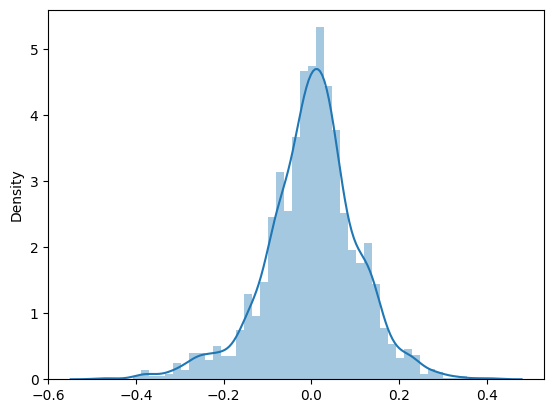

In [233]:

res = y_train - y_train_pred

# Checking the assumption : if the distribution of residual terms are centered around zero and is approximately normal 
sns.distplot(res)
plt.show()

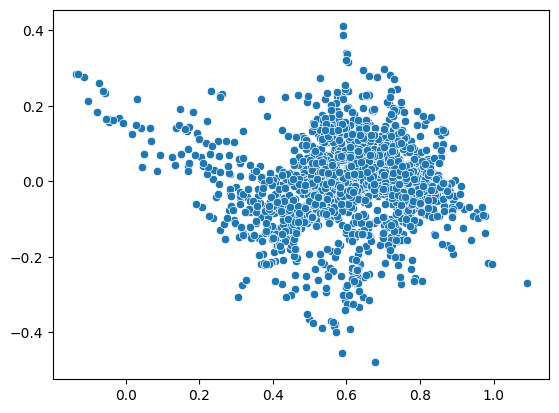

In [234]:
# checking if the residual are randomly distributed. 
sns.scatterplot(x= y_train_pred, y = res)
plt.show()


In [235]:
vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = final_data.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(final_data.values,i) for i in range (final_data.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)
vif


variables   VIF
0         Adult_Mortality  2.43
2         Body_Mass_Index  2.26
3       Under_Five_Deaths  1.95
4                HIV_AIDS  1.53
5  Gross_Domestic_Product  1.47
1           Measles_Cases  1.46
6         Population_Size  1.44

### Prediction on test set

In [236]:
data_test.shape

(882, 16)

### Normalization of the test data

In [237]:
#normalization of the test data
data_test[numeric] = scaler.fit_transform(data_test[numeric])
data_test.head(10)

Country_Status  Life_Expectancy  Adult_Mortality  Alcohol_Consumption   
1698               1         0.730550         0.183381             0.287861  \
134                0         0.867173         0.108883             0.652601   
1442               0         0.726755         0.217765             0.265483   
642                0         0.787476         0.137536             0.701156   
2720               1         0.402277         0.540115             0.556069   
836                1         0.400380         0.467049             0.619075   
971                1         0.415560         0.411175             0.168786   
294                1         0.590133         0.330946             0.009249   
2722               1         0.364326         0.057307             0.557225   
2388               1         0.282732         0.487106             0.000000   

      Hepatitis_B  Measles_Cases  Body_Mass_Index  Under_Five_Deaths   
1698     0.978947       0.000164         0.591335           0.031429  \
134      0.831579       0.000269         0.618267           0.000000   
1442     0.947368       0.000000         0.694379           0.000000   
642      0.957895       0.000000         0.716628           0.000000   
2720     0.789474       0.008773         0.163934           0.059048   
836      0.809900       0.001759         0.252927           0.001905   
971      0.957895       0.000000         0.229508           0.002857   
294      0.936842       0.000033         0.206089           0.000476   
2722     0.726316       0.020692         0.155738           0.065238   
2388     0.809900       0.065803         0.204918           0.038095   

      Polio_Vaccination  Total_Expenditure  Diphtheria_Vaccination  HIV_AIDS   
1698           0.979167           0.278887                0.979167  0.000000  \
134            0.833333           0.654567                0.833333  0.000000   
1442           0.958333           0.336854                0.958333  0.000000   
642            0.958333           0.449486                0.958333  0.000000   
2720           0.781250           0.487598                0.791667  0.158416   
836            0.000000           0.203267                0.000000  0.110891   
971            0.947917           0.311555                0.958333  0.057426   
294            0.937500           0.358742                0.937500  0.005941   
2722           0.041667           0.568058                0.729167  0.164356   
2388           0.000000           0.336854                0.000000  0.015842   

      Gross_Domestic_Product  Population_Size  Income_Composition   
1698                0.005773         0.010407            0.737513  \
134                 0.411635         0.007409            0.924548   
1442                0.118023         0.001756            0.879915   
642                 0.116303         0.003764            0.871413   
2720                0.005551         0.029101            0.493092   
836                 0.019371         0.000163            0.622742   
971                 0.064606         0.011325            0.441020   
294                 0.001491         0.000634            0.000000   
2722                0.000322         0.000319            0.469713   
2388                0.064606         0.011325            0.666898   

      Years_of_Schooling  
1698            0.553398  
134             0.742718  
1442            0.776699  
642             0.733010  
2720            0.524272  
836             0.446602  
971             0.393204  
294             0.529126  
2722            0.500000  
2388            0.582174

In [238]:
final_data.columns

Index(['Adult_Mortality', 'Measles_Cases', 'Body_Mass_Index',
       'Under_Five_Deaths', 'HIV_AIDS', 'Gross_Domestic_Product',
       'Population_Size'],
      dtype='object')

In [243]:
var = ['Adult_Mortality', 'Measles_Cases', 'Body_Mass_Index',
       'Under_Five_Deaths', 'HIV_AIDS', 'Gross_Domestic_Product',
       'Population_Size', 'Life_Expectancy']
pred_df = data_test[var]


In [244]:
final_data.head()

Adult_Mortality  Measles_Cases  Body_Mass_Index  Under_Five_Deaths   
405          0.385042       0.011834         0.189550             0.0296  \
989          0.184211       0.032269         0.572296             0.0004   
2351         0.011080       0.000000         0.673147             0.0000   
1856         0.108033       0.000156         0.735115             0.0000   
1479         0.728532       0.011726         0.348724             0.0024   

      HIV_AIDS  Gross_Domestic_Product  Population_Size  
405   0.017928                0.004815         0.001210  
989   0.000000                0.001055         0.000003  
2351  0.000000                0.206695         0.000185  
1856  0.000000                0.021320         0.009857  
1479  0.264940                0.009831         0.000019

In [245]:
pred_df.head()

Adult_Mortality  Measles_Cases  Body_Mass_Index  Under_Five_Deaths   
1698         0.183381       0.000164         0.591335           0.031429  \
134          0.108883       0.000269         0.618267           0.000000   
1442         0.217765       0.000000         0.694379           0.000000   
642          0.137536       0.000000         0.716628           0.000000   
2720         0.540115       0.008773         0.163934           0.059048   

      HIV_AIDS  Gross_Domestic_Product  Population_Size  Life_Expectancy  
1698  0.000000                0.005773         0.010407         0.730550  
134   0.000000                0.411635         0.007409         0.867173  
1442  0.000000                0.118023         0.001756         0.726755  
642   0.000000                0.116303         0.003764         0.787476  
2720  0.158416                0.005551         0.029101         0.402277

In [246]:
y_test = pred_df.pop('Life_Expectancy')
x_test = pred_df

### Making predictions of the test set using the linear regression model

In [247]:
x_test_sm = sm.add_constant(x_test)

In [248]:
y_test_pred = linear_regression_model.predict(x_test_sm)


#### Evalutation of the model based on predicted and test data 

/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_1366/834886408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, color = 'green', hist = False)
/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_1366/834886408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

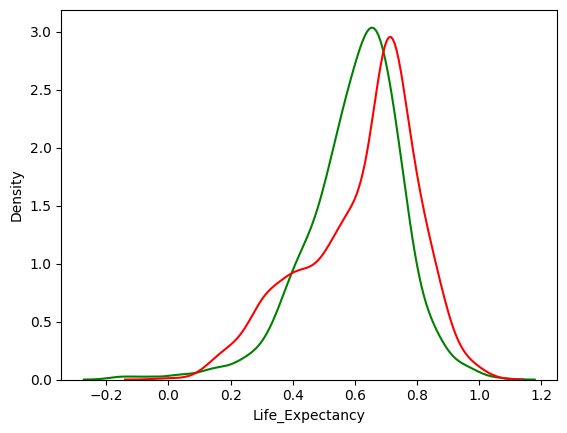

In [249]:
sns.distplot(y_test_pred, color = 'green', hist = False)
sns.distplot(y_test, color = 'red', hist = False)
plt.show()

#### Evalutation of the model based on R squared score

In [250]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.638442549881783

* The R squared vlaue obtained in the training dataset is 0.687
* The R sqaured valiue obtained in the test dataset : 0.638
* The differene in values lie with the range of 4.9 percent.
* Summary : The model is making good predictions based on R squared values 

### Final Model Summary


* Adult Mortality decreases the life expectancy
* Measles decreases the life expectancy
* Under five death decreases the life expectancy
* Life expectancy increases with total expenditure
* HIV aids decreases life expectancy 
* Body mass index has important role in increase of the life expectancy
